# HPC@UCLA: Running batch jobs 

## Raffaella D'Auria, PhD

### Today Learning Outcomes

- the Hoffman2 Cluster: system overview (recap)
- how to follow this presentation on a terminal or on a jupyter notebook
- working interactively on the Hoffman2 Cluster (recap)
- where to look for applications already available on the Hoffman2 Cluster (recap)
- running non interactive work-flow (batch jobs)
- array job example


## Where is the slide deck for this presentartion?

Navigate to:

https://github.com/rdauria/HPC_at_UCLA

and look for:

https://github.com/rdauria/HPC_at_UCLA/blob/main/Batch_Jobs_on_H2C.ipynb   

## How to follow this presentation

You can of course just follow by listening to the presentation, but if you can try out various commands it will help build your skills on using the cluster.

To try out the various commands that will be showcased, in this presentation we assume that: 

- you already have an account on the Hoffman2 Cluster
- on your local computer you have access to a terminal and an SSH client or you have installed a remote desktop to connect to the cluster 


## How to run this presentation as a jupyter notebook:

This presentation is a jupyter notebook, if you so choose you can run it following these steps:

1. open a terminal on your local computer (**DO NOT SSH INTO THE CLUSTER**)
2. download the python script h2jupy with the command:

    $ `curl -O https://raw.githubusercontent.com/rdauria/jupyter-notebook/main/h2jupynb`
    
   or:
   
    $ `wget https://raw.githubusercontent.com/rdauria/jupyter-notebook/main/h2jupynb`




## How to run this presentation as a jupyter notebook - cont'd:

3. run the script with, for example, if your Hoffman2 Cluster account is `joebruin` (substitute `joebruin` w/ your user name):

    $ `python h2jupynb -u joebruin -t 2 -m 5
    `

    or:

    $ `python3 h2jupynb -u joebruin -t 2 -m 5`
    

## How to run this presentation as a jupyter notebook - cont'd II:


4. when the jupyter notebook interface opens of your local browser, click on the `New` button and select `terminal`
5. when the terminal opens on your browser issue the command **(do not include the `$` sign)**:

   $ `cp /u/project/systems/PUBLIC_SHARED/dauria/HPC_at_UCLA/Batch_Jobs_on_H2C.ipynb ./  `


6. navigate back to the Jupyter Notebook homepage and search for and double click on: 

    `Batch_Jobs_on_H2C.ipynb`  

7. this presentation should open as a notebook

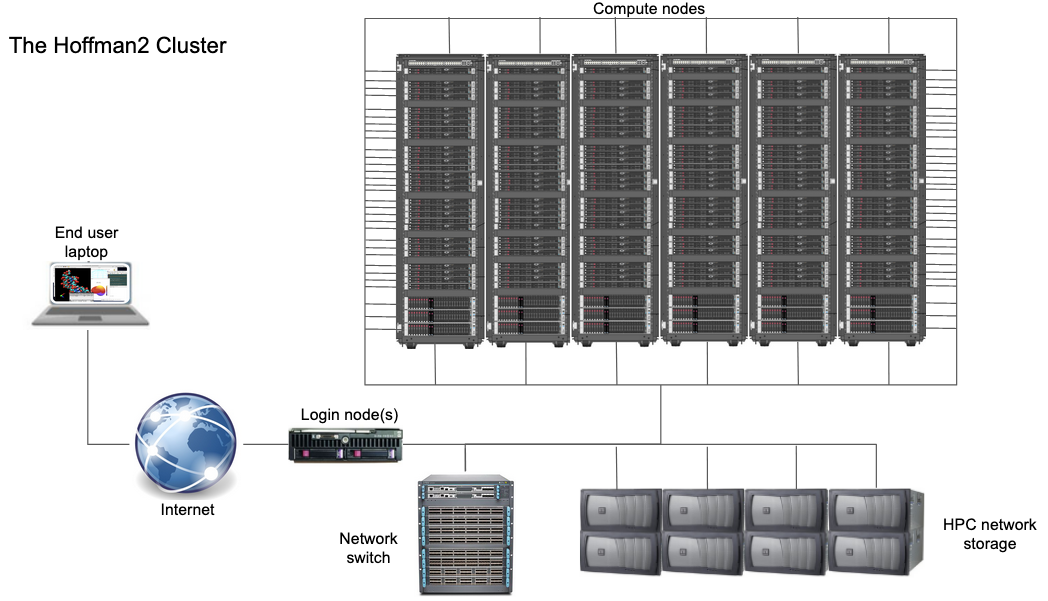

## What type of computational nodes are available?

In [ ]:
CLUSTER_AT_A_GLANCE

## What type of GPU nodes:

In [ ]:
PUBLIC_GPU_TYPES

## Do you have access to group-owned nodes or are you part of campus?

- try the command: 

$ `myresources`

## How do you execute your work on the cluster?

- Computational, memory, I/O intensive work should be run on compute nodes (and **NOT** on login-type nodes)
- Resources for interactive sessions or non-interactive (a.k.a. batch) jobs are awarded by the scheduler via:

  - the `qrsh` command for interactive session (see: https://github.com/rdauria/HPC_at_UCLA/blob/main/InteractiveComputingonH2C.ipynb)
  - the `qsub` command for non-interactive (batch) jobs (this presentation, see below)

## How to find which applications are already installed on H2C

- Most applications have a `modulefile` associated with them and can be found, for example for R, with:

```
module av R
```
or:
```
modules_lookup -m R
```
- see:  https://github.com/rdauria/HPC_at_UCLA/InteractiveComputingonH2C.ipynb

## Submitting non interactive (batch) jobs

### What is a batch job?

- a simulation that can be executed without user intervention following a recipe (script)





### Why?

- instead of waiting for your interactive session to start, batch jobs start whenever resources become available
- you get notified by email message when the job starts, finishes or errors out
- your job does not depend on the persistence of your network connection
- after submitting batch jobs you can close the connection to the cluster
- you can submit very many batch jobs and they will all execute as resources become available


### How?

- you will generally use a **submission script** (a job recipe) in conjunction with the commend: `qsub`
- a submission script sets the job environment and contains the sequence of commands needed to run the job
- a submission script (may) contain instructions for the scheduler (requests for resources, etc.)

## Hands-on submitting a batch job

In [ ]:
# create a unique time stamp and save it in the variable timestamp
timestamp=`date "+%F"` 

# create a time-stamped directoryand and cd to it:
mkdir $HOME/HPC_AT_UCLA_$timestamp; cd $HOME/HPC_AT_UCLA_$timestamp; pwd

# if the submission script submit_job.sh is not there yet fetch a copy from /u/local/apps/submit_scripts
if [ ! -f "submit_job.sh" ]; then 
   cp /u/local/apps/submit_scripts/submit_job.sh ./submit_job.sh
else 
   echo "File: submit_job.sh already present"; 
fi 

# check that the submission script has been copied in the current directory:
ls -l submit_job.sh 

## Let's look inside the submission script

In [ ]:
# let's take a look at the submission script:

cat submit_job.sh

### PARTS OF A SUBMISSION SCRIPT

- scheduler-related:

```
#!/bin/bash
#$ -cwd
# error = Merged with joblog
#$ -o joblog.$JOB_ID
#$ -j y
# Edit the line below as needed
#$ -l h_rt=1:00:00,h_data=1G
# Add multiple cores/nodes as needed:
#$ -pe shared 1
# Email address to notify
#$ -M $USER@mail
# Notify when
#$ -m bea
```

- useful but not strictly needed comments for joblog:

```
# echo job info on joblog:
echo "Job $JOB_ID started on:   " `hostname -s`
echo "Job $JOB_ID started on:   " `date `
echo " "


# echo job info on joblog:
echo " " 
echo "Job $JOB_ID ended on:   " `hostname -s`
echo "Job $JOB_ID ended on:   " `date `
echo " "

```

- setting the job environment & running the job (actual recipe):

```
# load the job environment:
. /u/local/Modules/default/init/modules.sh
module load python/3.9.6
module li
echo " "

# substitute the command to run your code below:
echo 'pwd; python --version'
pwd; python --version
```

## Let's submit the script

In [ ]:
# now submit the job: 
qsub submit_job.sh 

# is my job running? 
myjobs 

# save the job ID number into the variable $JOB_ID for later use:
JOB_ID=`myjob | grep submit_job | awk '{print $1}'`

# echo the JOB_ID:
echo "JOB_ID=$JOB_ID"

## How to request resources for your batch job

### within a submission script:

     #$ -l h_data=10G    # requests 10GB of memory per core requested
     
     #$ -l h_rt=3:00:00  # requests 3 hours runtime
     
     #$ -l exclusive     # requests an entire node (and all of its memory and cores)
     
     #$ -l highp         # requests to run on owned nodes (only available if not campus users)
     
     #$ -l gpu           # requests to run on a gpu node
     
     

### At the command line:

     qsub -l h_data=10G,h_rt=3:00:00 submit_job.sh
     

Note: the command line request overcome whatever resource requested in the submission script 

See: https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#requesting-resources-other-than-cores

## How to request multiple cores for your batch job


### within a submission script:


     #$ -pe shared 10   # requests 10 cores from the same compute node (server), use for shared memory parallelism
     
     #$ -pe dc* 100     # requests 100 cores from any compute node on the cluster, use for distributed memory parallelism
     
     #$ -pe node 2      # requests 2 nodes (use with -l exclusive to request 2 exclusive nodes)


### At the command line:


     qsub -l h_data=10G,h_rt=3:00:00 -pe shared 4 submit_job.sh
     
     
**Note: memory (h_data) is per core so the command above requests a total of 40GB**


See: https://www.hoffman2.idre.ucla.edu/Using-H2/Computing/Computing.html#requesting-multiple-cores

## When will my job start?

Very many jobs are constantly running on the cluster... how many jobs are waiting to start?

In [ ]:
#first four jobs queuing (status "p" pending):

qstat -s p | head -n 6

In [ ]:
# tot. no. of currently jobs pending 

qstat -s p | grep qw | wc -l

In [ ]:
#Let's count the total number of compute cores requested using some handy command line expressions:

count=1; qstat -s p | grep qw | awk -v count=$count '{count=count+$8} END {print "Total no. of cores requested: "count}'

## How many jobs are currently running?


In [ ]:
#first four jobs running (status "r" running):

qstat -s r | head -n 6

In [ ]:
# tot. no. of jobs running

qstat -s r | grep r | wc -l

In [ ]:
#Let's count the total number of compute cores currently running jobs using some handy command line expressions: 

count=1 ; val=0 ; qstat -s r | grep @ | awk -v count=$count '{count=count+$9} END {print "Total no. of cores in use: "count}'


## The joblog file

In [ ]:
# let's take a look at the joblog file: 

cat joblog.${JOB_ID}

In [ ]:
cat submit_job.sh

## Where to find sample submission scripts

Under: https://www.hoffman2.idre.ucla.edu/Using-H2/Software/Software.html

Look for a specific software and navigate to the `Batch use` tab:

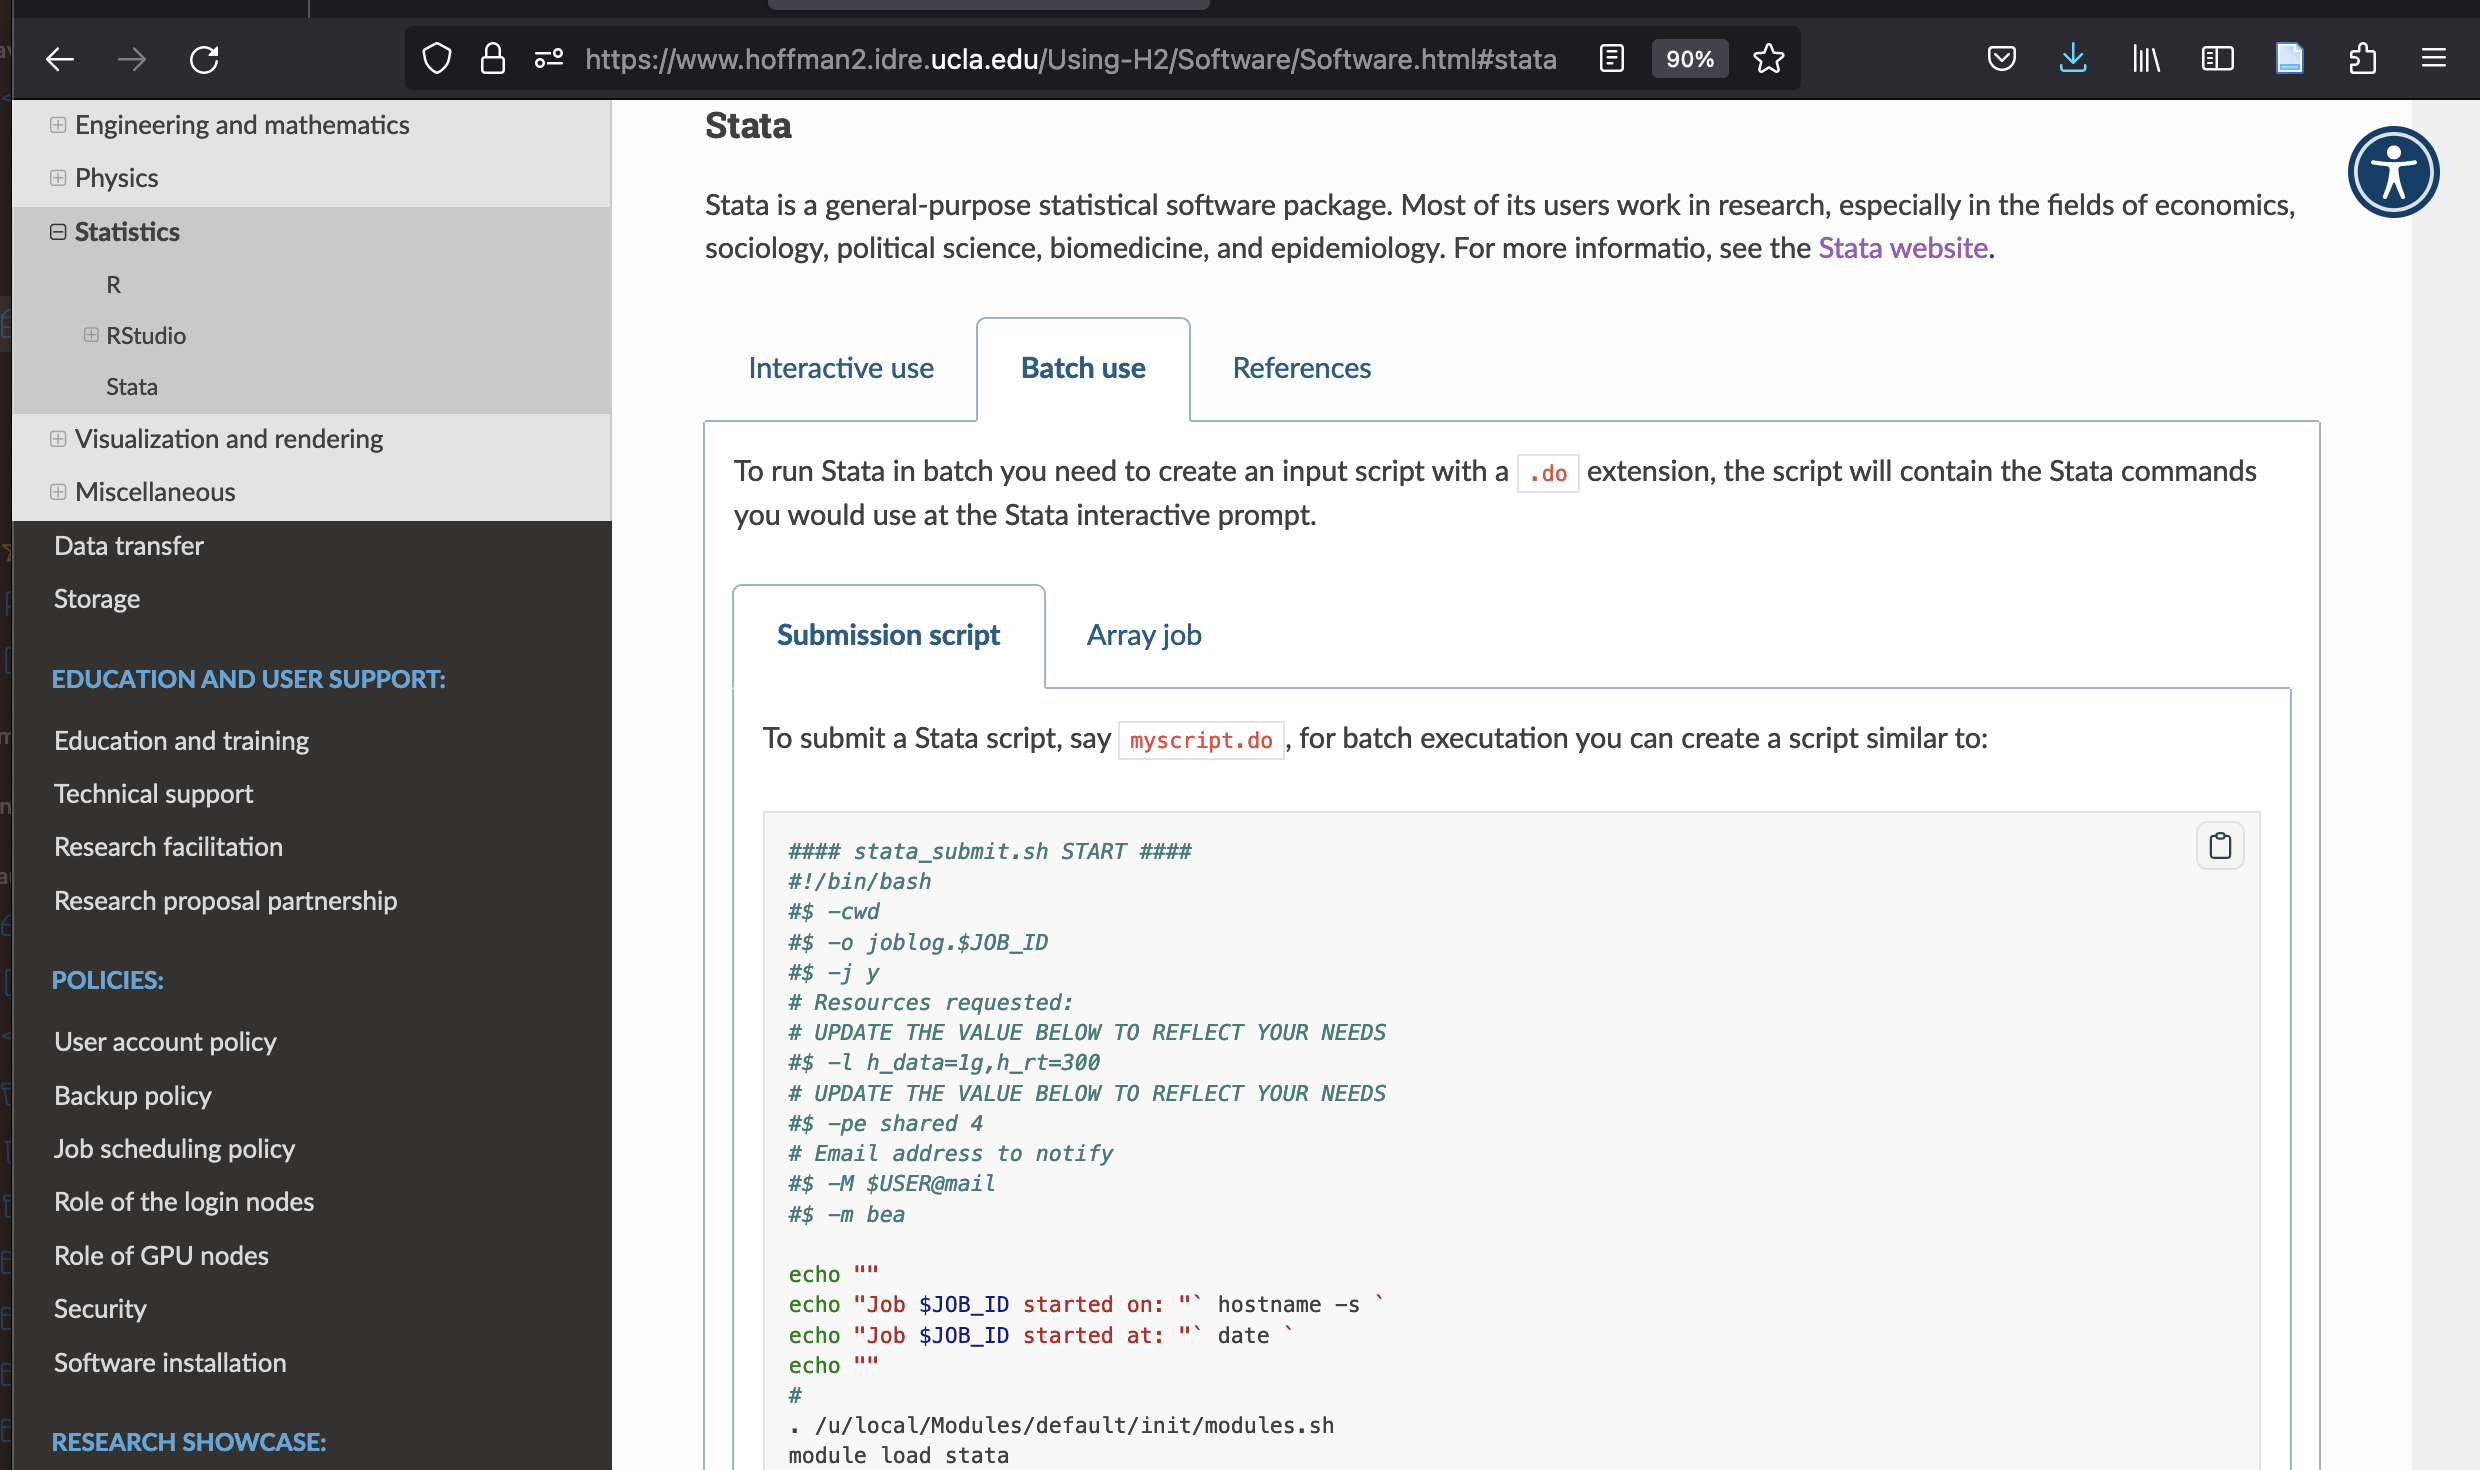

- Paste the script (use copy button) in a file on Hoffman2

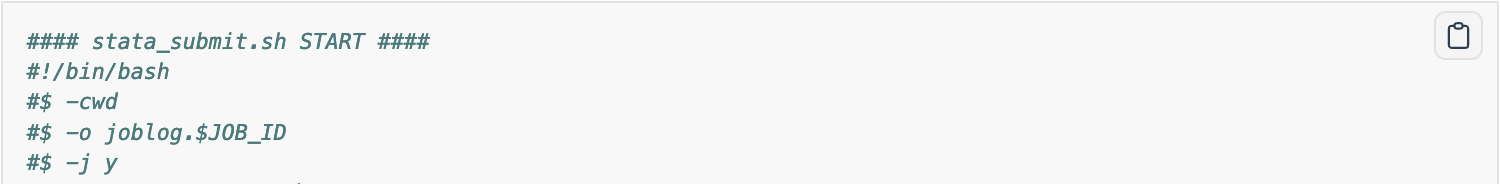

- use, for example, the `nano` editor:

    $ nano stata_submit.sh


- paste in the shell the script, edit as needed and exit and save (`Control` + `x`)

- submit the job w/:

    $ qsub stata_submit.sh



## R example

In [ ]:
# let's make sure we are in the right directory:
cd $HOME/HPC_AT_UCLA_$timestamp; pwd

# let's copy an R script:
if [ ! -f R-benchmark-25.R ]; then 
  cp /u/local/apps/submit_scripts/R/R-benchmark-25.R ./
fi

# let's copy an R submission script:
if [ ! -f R_submit.sh ]; then 
  cp /u/local/apps/submit_scripts/R/R_submit.sh ./
fi

In [ ]:
# the submission script for an R job:

cat R_submit.sh

In [ ]:
# let's submit the job:
qsub R_submit.sh
JOB_ID_R=`myjob | grep R_submi | tail -n 1 | awk '{print $1}'` 
echo $JOB_ID_R

In [ ]:
myjob

In [ ]:
cat R-benchmark-25.output.$JOB_ID_R

In [ ]:
cat joblog.$JOB_ID_R

## Array jobs

- Suppose you have an operation that you have to repeat over and over according to different conditions
- Each operation is independent from the result you get in any other operation, e.g.:
 
  - adding components of two vectors
  - for/while/do loops (with no conditionals: if/then/else)
  - parametric studies


- You can carry on the operations sequentially in one job or distribute them across many jobs

  - these many jobs do not need to be synchronous!!!

- The scheduler allows you to submit these many jobs with one job script


## Array jobs for embarrassingly parallel workload 

"In parallel computing, an embarrassingly parallel workload or problem (also called perfectly parallel or pleasingly parallel) is one where little or no effort is needed to separate the problem into a number of parallel tasks.” [Wikipedia]

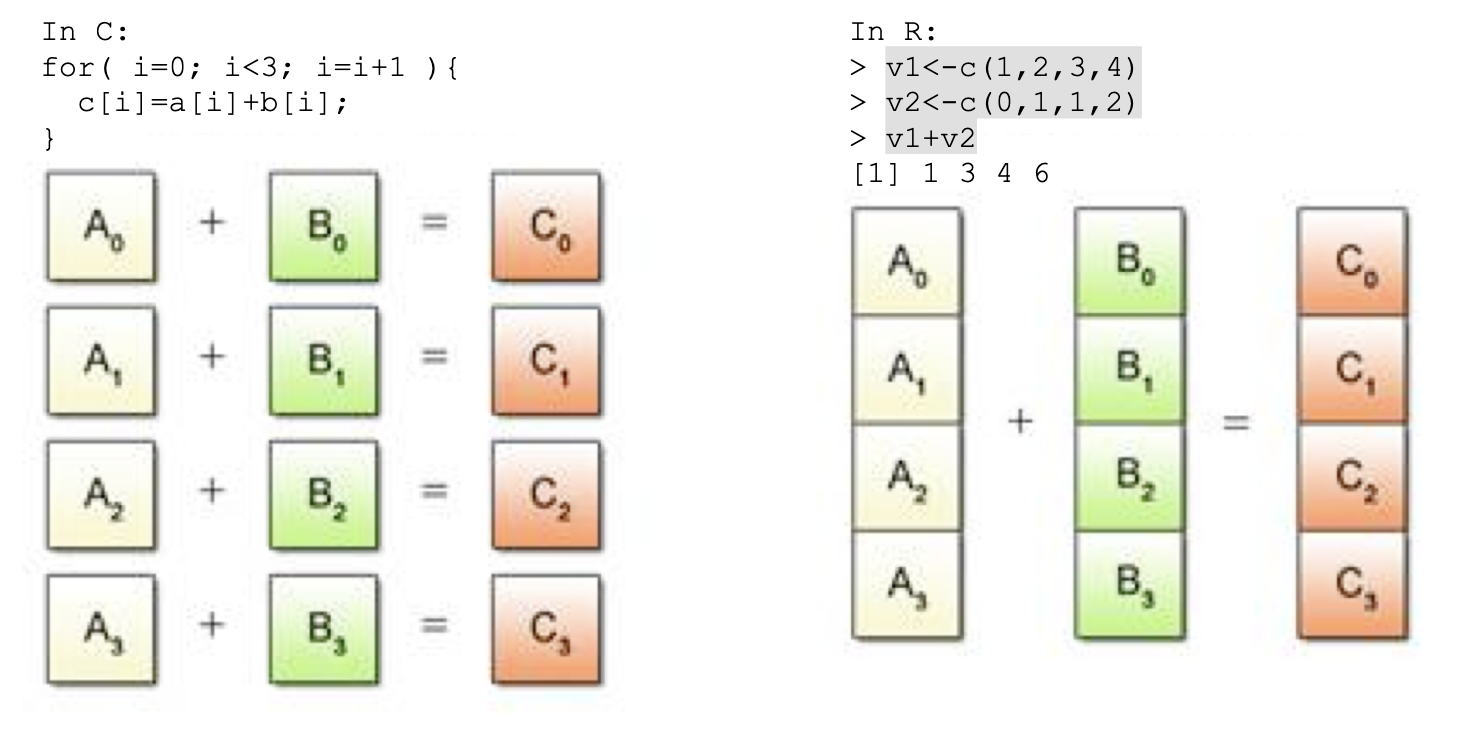

## What is the best way to run embarrassingly parallel workload on a cluster?

Request multiple **concurrent** cores on a same or any node?

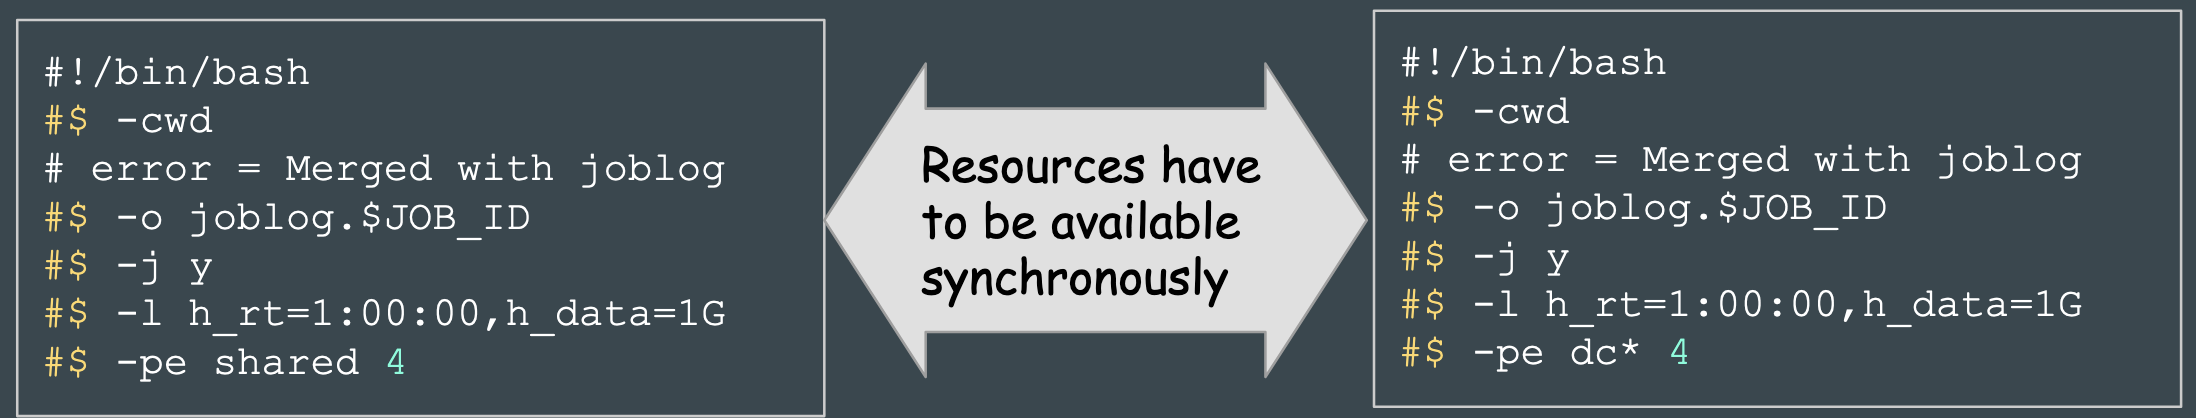



## Best way to run embarrassingly parallel workload on a cluster

How about request multiple cores anywhere on the cluster asynchronously? 

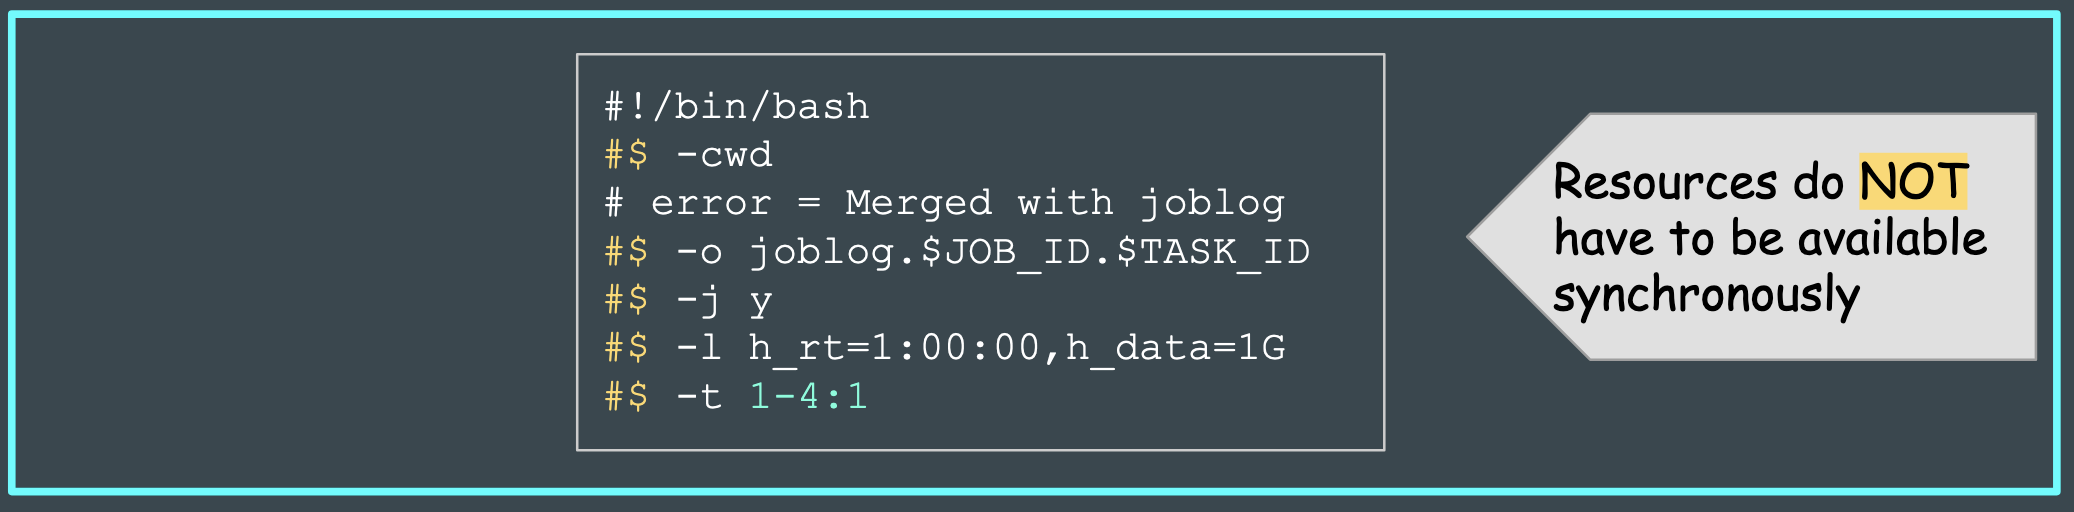

## Hands-on example

We are going to solve a toy embarrassingly parallel workload first serially and then as an array job

In [ ]:
# let's make sure we are in the right directory:
cd $HOME/HPC_AT_UCLA_$timestamp; pwd

DIR_ARRAY=$HOME/HPC_AT_UCLA_$timestamp/ARRAY_TEST
if [ ! -d ${DIR_ARRAY} ]; then 
  cp -rp /u/local/apps/submit_scripts/array_jobs/ARRAY_TEST ${DIR_ARRAY}
  cd ${DIR_ARRAY}
fi
ls -latr

In [ ]:
# file listing the day of the week:

cat days.txt

In [ ]:
# script that manipulates (sequentially each line of the text file days.txt)
echo "############## mysequentialjob.py ##############"
cat mysequentialjob.py 
echo "################################################"

In [ ]:
# MODIFIED SCRIPT THAT ONLY ACTS ON ONE LINE OF THE days.txt FILE:
echo "############## myarrayjob.py ##############"
cat myarrayjob.py
echo "###########################################"

In [ ]:
# Array jobs - solving an embarassangly parallel problem with an array job: 

cat submit_array.sh

In [ ]:
qsub submit_array.sh 
JOB_ID2=`myjob | grep submit_arr | tail -n 1 | awk '{print $1}'` 

In [ ]:
ls -latr

In [ ]:
ls -latr OUT_ARRAY

In [ ]:
cat OUT_ARRAY/myarrayjob.joblog.$JOB_ID2.3

In [ ]:
cat OUT_ARRAY/myarrayjob.output.${JOB_ID2}.1

In [ ]:
cat OUT_ARRAY/myarrayjob.output.${JOB_ID2}.6

In [ ]:
# Putting the output together:

for i in `seq 1 7`; do 
    cat OUT_ARRAY/myarrayjob.output.${JOB_ID2}.$i >> my_days_of_the_week.txt
done

cat my_days_of_the_week.txt